In [1]:
import numpy as np
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### This part just makes it easier to do live updates from the sheet
### This fetches data from the google sheet and writes to the 'EnergyDistributionData.csv'
### However I do not want to put my service key on github, so if you want to run this just ask for the service key
### NOTE for tutors - this section is not necessary, this git repo will contain the data - just run the next cell
scope = [
   'https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
#Name of our Service Account Key
google_key_file = 'service_key.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(google_key_file, scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '11yF4VFlMYCyfHdulolGM9P_yIwRX9icS-Zv27uayVKY'
sheet_name = 'data_export_exp3'
sheet_name_positive = 'data_export_exp3_set_2'

#negative voltage Values
#Opening the worksheet by using Worksheet ID
workbook = gc.open_by_key(spreadsheet_key)
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(sheet_name)
values = sheet.get_all_values()
#Pulling the data and transform it to the data frame
df = pd.DataFrame(values[1:], columns = values[0])
# df[['v_b', 'i_b','v_g','i_g','v_y','i_y']] = df[['v_b', 'i_b','v_g','i_g','v_y','i_y']].astype(float)
# df.dtypes
for column in df.columns:
    df[column]= df[column].astype('float64') 
df.to_csv('EnergyDistributionData.csv',index=False)

#postive voltage 
#Opening the worksheet by using Worksheet ID
workbook_positive = gc.open_by_key(spreadsheet_key)
#Selecting which sheet to pulling the data
sheet_positive = workbook.worksheet(sheet_name_positive)
values_positive = sheet_positive.get_all_values()
#Pulling the data and transform it to the data frame
df_positive = pd.DataFrame(values_positive[1:], columns = values_positive[0])
# df[['v_b', 'i_b','v_g','i_g','v_y','i_y']] = df[['v_b', 'i_b','v_g','i_g','v_y','i_y']].astype(float)
# df.dtypes
for column in df_positive.columns:
    df_positive[column]= df_positive[column].replace('',np.nan).astype('float64')
df_positive.to_csv('EnergyDistributionDataPositive.csv',index=False)

In [3]:
#Reading the data
df = pd.read_csv('EnergyDistributionData.csv')
df_positive = pd.read_csv('EnergyDistributionDataPositive.csv')

In [4]:
#used to generate voltage distribution between i = 0 and i = max
# dist = np.linspace(0,3.5,20)
# for x in dist: print(round(x,3))

<Figure size 432x288 with 0 Axes>

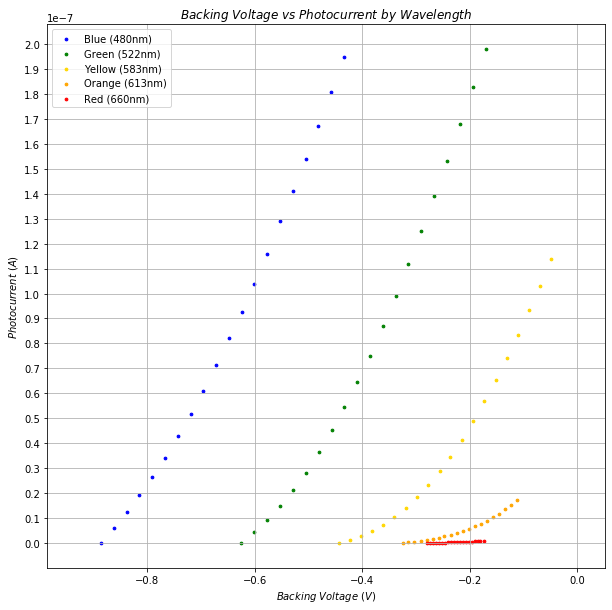

In [25]:
#initial plot of data
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(df.v_b, df.i_b,color='blue', label="Blue (480nm)", marker='.', s=30)
# plt.scatter(df.v_b, df.i_predicted_b,color='black', label="Blue (480nm)", marker='x', s=20)
plt.scatter(df.v_g,df.i_g, color='green',label="Green (522nm)",marker='.', s=30)
plt.scatter(df.v_y,df.i_y,color='gold',label="Yellow (583nm)",marker='.', s=30)
plt.scatter(df.v_o,df.i_o,color='orange',label="Orange (613nm)",marker='.', s=30)
plt.scatter(df.v_r,df.i_r,color='red',label="Red (660nm)",marker='.', s=30)
plt.title(r'$Backing \ Voltage \ vs \ Photocurrent \ by \ Wavelength$')
plt.xlabel(r'$Backing \ Voltage \ (V)$')
plt.ylabel(r'$Photocurrent \ (A)$')
plt.legend(loc='upper left')
# plt.show()
axes = plt.gca()
axes.set_ylim(-1e-8,max(df.i_g)+ 1e-8)
axes.set_xlim(min(df.v_b)-0.1,max(df.v_y)+0.1)
plt.yticks(np.arange(0,210e-9,10e-9))
plt.grid()
plt.show()

In [1]:
# linear fit
from scipy.stats import linregress
# blue linear fit (x, y)
regress_b = linregress(df.v_b,df.i_b)
regress_fn_b = lambda x: regress_b.slope*x + regress_b.intercept
# green
regress_g = linregress(df.v_g,df.i_g)
regress_fn_g = lambda x: regress_g.slope*x + regress_g.intercept
# yellow
regress_y = linregress(df.v_y,df.i_y)
regress_fn_y = lambda x: regress_y.slope*x + regress_y.intercept
# orange
regress_o = linregress(df.v_o,df.i_o)
regress_fn_o = lambda x: regress_o.slope*x + regress_o.intercept
# red
regress_r = linregress(df.v_r,df.i_r)
regress_fn_r = lambda x: regress_r.slope*x + regress_r.intercept

v_all = np.concatenate((df.v_b,df.v_g,df.v_y,df.v_o,df.v_r), axis=0)
i_all = np.concatenate((df.i_b,df.i_g,df.i_y,df.i_o,df.i_r), axis=0)
regress_all = linregress(v_all, i_all)
regress_all_fn = lambda x: regress_all.slope*x + regress_all.intercept

NameError: name 'df' is not defined

<Figure size 432x288 with 0 Axes>

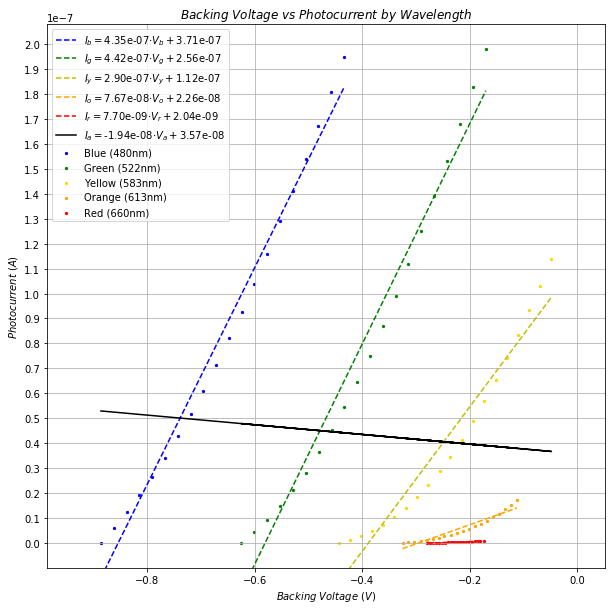

In [40]:
plt.clf()
plt.figure(figsize=(10,10))
#blue
plt.scatter(df.v_b, df.i_b,color='blue', label="Blue (480nm)", marker='.', s=20)
label_blue = r"$I_{b} = $"+"{:.2e}".format(regress_b.slope) + "$\cdot V_b + $" +"{:.2e}".format(regress_b.intercept)
plt.plot(df.v_b, regress_fn_b(df.v_b), 'b--', label=label_blue)

#green
plt.scatter(df.v_g,df.i_g, color='green',label="Green (522nm)",marker='.', s=20)
label_green = r"$I_{g} = $"+"{:.2e}".format(regress_g.slope) + "$\cdot V_g + $" +"{:.2e}".format(regress_g.intercept)
plt.plot(df.v_g, regress_fn_g(df.v_g), 'g--', label=label_green)

#yellow
plt.scatter(df.v_y,df.i_y,color='gold',label="Yellow (583nm)",marker='.', s=20)
label_yellow = r"$I_{y} = $"+"{:.2e}".format(regress_y.slope) + "$\cdot V_y + $" +"{:.2e}".format(regress_y.intercept)
plt.plot(df.v_y, regress_fn_y(df.v_y), 'y--', label=label_yellow)

#orange
plt.scatter(df.v_o,df.i_o,color='orange',label="Orange (613nm)",marker='.', s=20)
label_orange = r"$I_{o} = $"+"{:.2e}".format(regress_o.slope) + "$\cdot V_o + $" +"{:.2e}".format(regress_o.intercept)
plt.plot(df.v_o, regress_fn_o(df.v_o), '--',color='orange', label=label_orange)

#red
plt.scatter(df.v_r,df.i_r,color='red',label="Red (660nm)",marker='.', s=20)
label_red = r"$I_{r} = $"+"{:.2e}".format(regress_r.slope) + "$\cdot V_r + $" +"{:.2e}".format(regress_r.intercept)
plt.plot(df.v_r, regress_fn_r(df.v_r), 'r--', label=label_red)

#all
label_all = r"$I_{a} = $"+"{:.2e}".format(regress_all.slope) + "$\cdot V_a + $" +"{:.2e}".format(regress_all.intercept)
plt.plot(v_all, regress_all_fn(v_all), 'black', label=label_all)


plt.title(r'$Backing \ Voltage \ vs \ Photocurrent \ by \ Wavelength$')
plt.xlabel(r'$Backing \ Voltage \ (V)$')
plt.ylabel(r'$Photocurrent \ (A)$')
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_ylim(-1e-8,max(df.i_g)+ 1e-8)
axes.set_xlim(min(df.v_b)-0.1,max(df.v_y)+0.1)
plt.yticks(np.arange(0,210e-9,10e-9))
plt.grid()
plt.show()

In [8]:
from IPython.display import HTML, display
import tabulate
regression_data = [regress_b,regress_g,regress_y,regress_o,regress_r]
colours = ['Blue','Green','Yellow','Orange','Red']
table = [['Colour','Slope','Intercept','R-Value','P-value','Standard-Error']]
for i,item in enumerate(regression_data):
    item_data = [colours[i],"{:.2e}".format(item.slope),"{:.2e}".format(item.intercept),item.rvalue,"{:.2e}".format(item.pvalue),"{:.2e}".format(item.stderr)]
    table.append(item_data)
display(HTML(tabulate.tabulate(table, tablefmt='html')))   
pd.DataFrame(table).to_csv('LinearResssionOutput.csv',index=False)

Colour,Slope,Intercept,R-Value,P-value,Standard-Error
Blue,4.35e-07,3.71e-07,0.9932410651664692,2.73e-18,1.20e-08
Green,4.42e-07,2.56e-07,0.9876872751978405,5.91e-16,1.65e-08
Yellow,2.90e-07,1.12e-07,0.9722061331555337,8.50e-13,1.64e-08
Orange,7.67e-08,2.26e-08,0.9619403596807292,1.39e-11,5.13e-09
Red,7.70e-09,2.04e-09,0.9741432117031575,4.47e-13,4.21e-10


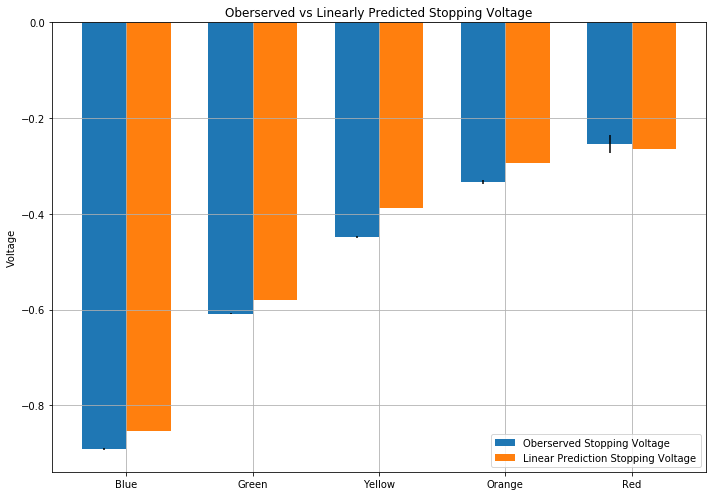

In [9]:
theoretical_stopping = []
theoretical_uncertainty = []
oberserved_stopping = [-0.892,-0.609,-0.448,-0.333,-0.254]
oberserved_uncertainty = [0.002,0.001,0.002,0.004,0.018]

for i,item in enumerate(regression_data):
    theoretical_stopping.append(-item.intercept/item.slope)
    theoretical_uncertainty.append(item.stderr)
    
x = np.arange(len(theoretical_stopping))
width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, oberserved_stopping, width, label='Oberserved Stopping Voltage', yerr=oberserved_uncertainty)
bar2 = ax.bar(x + width/2, theoretical_stopping, width, label='Linear Prediction Stopping Voltage', yerr=theoretical_uncertainty)
plt.legend()
plt.title('Oberserved vs Linearly Predicted Stopping Voltage')
plt.ylabel('Voltage')
ax.set_xticks(x)
ax.set_xticklabels(colours)
fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()
# plt.gid()
plt.grid(which='both')
plt.show()

<Figure size 432x288 with 0 Axes>

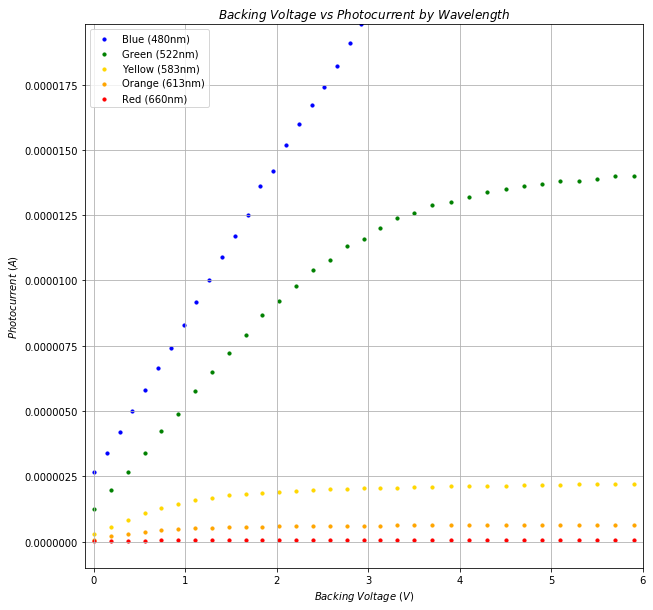

In [10]:
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(df_positive.v_b, df_positive.i_b,color='blue', label="Blue (480nm)", marker='.', s=40)
plt.scatter(df_positive.v_g,df_positive.i_g, color='green',label="Green (522nm)",marker='.', s=40)
plt.scatter(df_positive.v_y,df_positive.i_y,color='gold',label="Yellow (583nm)",marker='.', s=40)
plt.scatter(df_positive.v_o,df_positive.i_o,color='orange',label="Orange (613nm)",marker='.', s=40)
plt.scatter(df_positive.v_r,df_positive.i_r,color='red',label="Red (660nm)",marker='.', s=40)
plt.title(r'$Backing \ Voltage \ vs \ Photocurrent \ by \ Wavelength$')
plt.xlabel(r'$Backing \ Voltage \ (V)$')
plt.ylabel(r'$Photocurrent \ (A)$')
plt.legend(loc='upper left')
# plt.show()
axes = plt.gca()
axes.set_ylim(-0.1e-5,max(df_positive.i_b)+ 1e-8)
axes.set_xlim(-0.1,max(df_positive.v_y)+0.1)
# plt.yticks(np.arange(0,210e-9,10e-9))
plt.grid()
plt.show()

/Users/tiaanstals/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


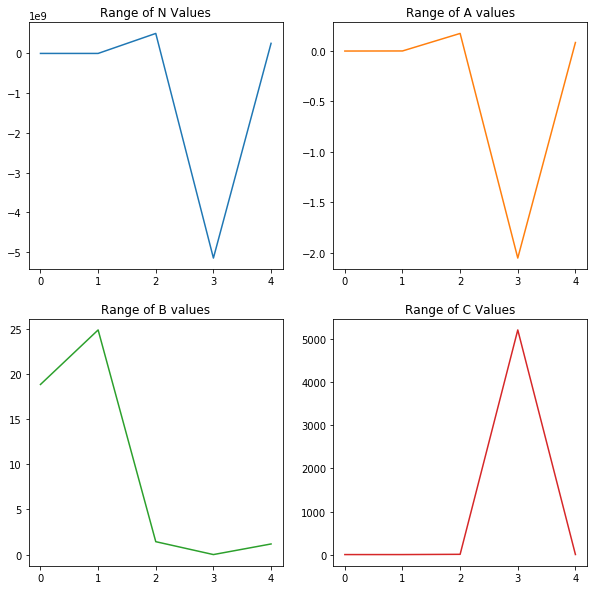

In [11]:
import scipy.constants as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.optimize import leastsq
import warnings

def model(V, N, A, B, C):
    w = 522*10**-9
    f = sc.c/w
    return  C*w*(N*sc.h*sc.N_A - A*np.e**(-B*V))
#     return  N - A*np.e**(-B*V)

fitted_params_list = []
v_b = [x for x in df_positive.v_b if str(x) != 'nan']
i_b = [x for x in df_positive.i_b if str(x) != 'nan']
fittedParameters2, pcov2 = curve_fit(model, v_b, i_b,maxfev=10000)
fitted_params_list.append(fittedParameters2)
for i in ['g','o','y','r']:
    v = 'v_' + i
    a = 'i_' + i
    fittedParameters2, pcov2 = curve_fit(model, df_positive[v], df_positive[a],maxfev=10000)
    fitted_params_list.append(fittedParameters2)

N_list = [x[0] for x in fitted_params_list]
A_list = [x[1] for x in fitted_params_list]
B_list = [x[2] for x in fitted_params_list]
C_list = [x[3] for x in fitted_params_list]
x = np.arange(5)
# plt.bar(x,N_list)
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x, N_list)
axs[0, 0].set_title('Range of N Values')
axs[0, 1].plot(x, A_list, 'tab:orange')
axs[0, 1].set_title('Range of A values')
axs[1, 0].plot(x, B_list, 'tab:green')
axs[1, 0].set_title('Range of B values')
axs[1, 1].plot(x, C_list, 'tab:red')
axs[1, 1].set_title('Range of C Values')
plt.figure(1, figsize=(10,10))
plt.show()


fitted_params[-1.34367135e+07 -4.66884788e-03  1.00651812e+00 -7.87598562e-19]


/Users/tiaanstals/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


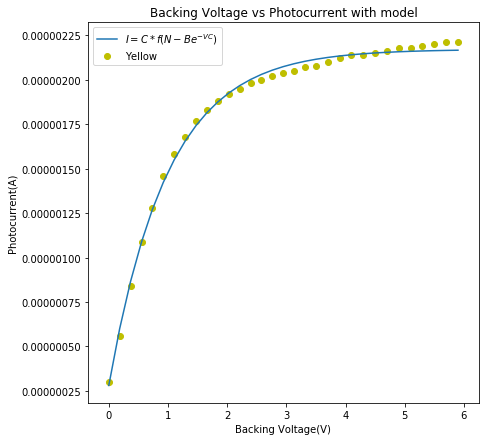

In [46]:
c_v = 'v_y'
c_i = 'i_y'
def model(V, N, A, B, C):
    w = 583*10**-9
    f = sc.c/w
    return  C*f*(N*sc.h*sc.N_A - A*np.e**(-B*V))
fittedParameters, pcov = curve_fit(model, df_positive[c_v], df_positive[c_i],maxfev=10000)

print("fitted_params" + str(fittedParameters))
plt.figure(figsize=(7,7))
y = model(df_positive[c_v],*fittedParameters)
plt.plot(df_positive[c_v],y, label=r'$I = C*f(N - Be^{-VC})$')
plt.scatter(df_positive[c_v], df_positive[c_i], c=c_v.split("_")[1] , label='Yellow')
plt.ylabel('Photocurrent(A)')
plt.xlabel('Backing Voltage(V)')
plt.title('Backing Voltage vs Photocurrent with model')
plt.legend()

In [13]:
def model_full(V, F, N, A, B, C):
    # N - constant we are scaling
    # F - frequency which changes with light source
    # sc.h - plancks constant
    # sc.N_A avagadros constant
    return  C*F*(N*sc.h*sc.N_A - A*np.e**(-B*V))

def leastsq_function(params, *args):
    #parameters we are trying to fit
    N = params[0]
    A = params[1]
    B = params[2]
    C = params[3]
#     print(params)
    
    # dataset concatenated (so that we can make use of the least sqs function)
    V = args[0]
    I = args[1]
    
    # how to break up dataset
    n1, n2, n3, n4 = args[2]
    
    #frequency of light (which we change but are not modelling)
    F = args[3]
    
    

    ifit = np.empty(V.shape)
    ifit[:n1] = model_full(V[:n1], F[0], N, A, B, C)
    ifit[n1:n2] = model_full(V[n1:n2], F[1], N, A, B, C)
    ifit[n2:n3] = model_full(V[n2:n3], F[2], N, A, B, C)
    ifit[n4:] = model_full(V[n4:], F[3], N, A, B, C)
#     ifit[n5:] = model_full(V[n5:], F[4], N, A, B, C)
    return I - ifit

x_sets = [df_positive.v_g,df_positive.v_y,df_positive.v_o,df_positive.v_r]
y_sets = [df_positive.i_g,df_positive.i_y,df_positive.i_o,df_positive.i_r]
wavelengths = np.array([522,583,613,660])
frequencies = (sc.c/(wavelengths*10**-9))
x_data = []
y_data = []
set_breakers = []
last_index = 0
for x_set, y_set in zip(x_sets, y_sets):
    x_set = [x for x in x_set if str(x) != 'nan']
    y_set = [x for x in y_set if str(x) != 'nan']
    len_set = last_index + len(x_set)
    last_index = len_set
    set_breakers.append(len_set)
    x_data.extend(x_set)
    y_data.extend(y_set)
x_data = np.array(x_data)
y_data = np.array(y_data)

In [14]:
N0 = 2.72333529e-12
A0 = 5.43290203e-07
B0 = 1.42854072e+00
C0 = 7.69463595e-18
# N0 = 2.72333529e-5
# A0 = 5.43290203e-3
# B0 = 1.42854072
params0 = [N0, A0, B0, C0]
args = (x_data, y_data, tuple(set_breakers), tuple(frequencies))
result = leastsq(leastsq_function, params0, args=args, full_output=True)
print(result[0])

[2.72333529e-12 5.43290203e-07 1.42854072e+00 7.69463595e-18]


(-0.1, 6.0)

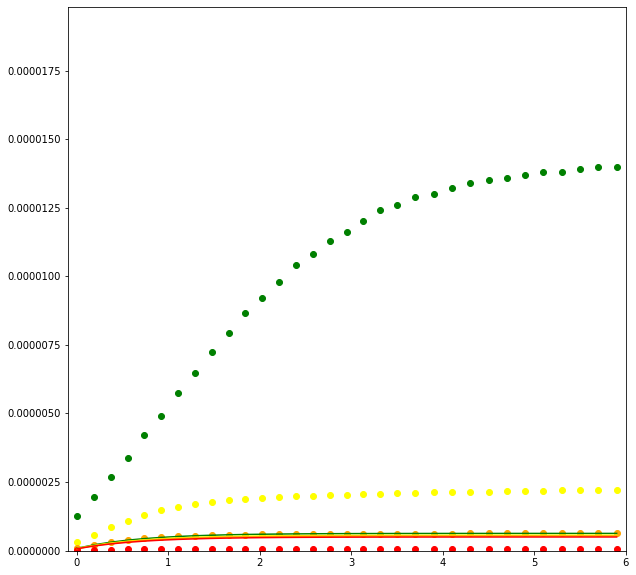

In [15]:
plt.figure(figsize=(10,10))
colours = ['green', 'yellow', 'orange', 'red']
for i in range(4):
    plt.scatter(x_sets[i],y_sets[i],color=colours[i])
    plt.plot(x_sets[i], model_full(x_sets[i],frequencies[i], *fittedParameters), color=colours[i])
axes = plt.gca()
axes.set_ylim(-0.1e-7,max(df_positive.i_b)+ 1e-8)
axes.set_xlim(-0.1,max(df_positive.v_y)+0.1)

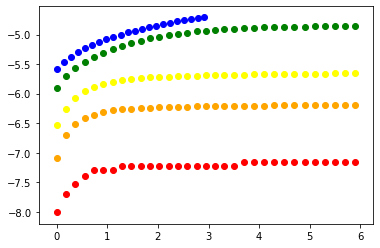

In [16]:
# try something with logs
plt.scatter(df_positive.v_b, np.log10(df_positive.i_b), label = 'Blue', c='blue')
plt.scatter(df_positive.v_g, np.log10(df_positive.i_g), label = 'Green', c='green')
plt.scatter(df_positive.v_o, np.log10(df_positive.i_o), label = 'Orange', c='orange')
plt.scatter(df_positive.v_r, np.log10(df_positive.i_r), label = 'Red', c='red')
plt.scatter(df_positive.v_y, np.log10(df_positive.i_y), label = 'Yellow', c='yellow')

fitted_params[-2.61574847e+01  4.11817212e-01  1.78960596e+00  1.99382291e+00
 -1.13532825e+07  1.00000000e+00]


/Users/tiaanstals/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


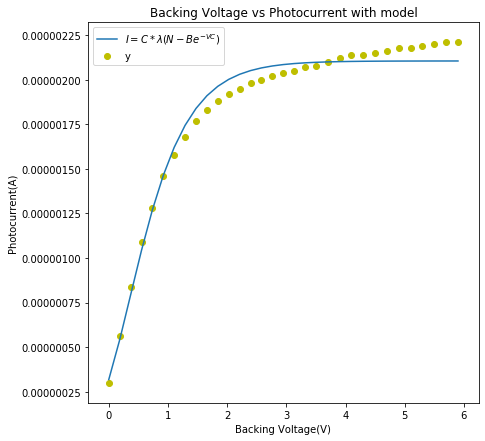

In [17]:
c_v = 'v_y'
c_i = 'i_y'
x_data = df_positive[c_v]
y_data = np.log10(df_positive[c_i])

def model(V, N, A, B, C, D,E):
    f = 5.7476*10**14
    w = 500*10**-9
    return  D*w + C*(N*sc.h*sc.N_A - A*np.e**(-B*V))

fittedParameters, pcov = curve_fit(model, x_data, y_data,maxfev=100000)

print("fitted_params" + str(fittedParameters))
plt.figure(figsize=(7,7))
y = 10**(model(x_data,*fittedParameters))
plt.plot(x_data,y, label=r'$I = C*\lambda(N - Be^{-VC})$')
plt.scatter(x_data, 10**(y_data), c=c_v.split("_")[1], label=c_v.split("_")[1])
plt.ylabel('Photocurrent(A)')
plt.xlabel('Backing Voltage(V)')
plt.title('Backing Voltage vs Photocurrent with model')
plt.legend()
plt.show()

In [18]:
def model_full(V, F, N, A, B, C, D, E):
    # N - constant we are scaling
    # F - frequency which changes with light source
    # sc.h - plancks constant
    # sc.N_A avagadros constant
    w = sc.c/F
    return  D*w + C*(N*sc.h*sc.N_A - A*np.e**(-B*V)) + E*V*w

def leastsq_function(params, *args):
    #parameters we are trying to fit
    N = params[0]
    A = params[1]
    B = params[2]
    C = params[3]
    D = params[4]
    E = params[5]
#     print(params)
    
    # dataset concatenated (so that we can make use of the least sqs function)
    V = args[0]
    I = args[1]
    
    # how to break up dataset
    n1, n2, n3, n4 = args[2]
    
    #frequency of light (which we change but are not modelling)
    F = args[3]
    
    

    ifit = np.empty(V.shape)
    ifit[:n1] = model_full(V[:n1], F[0], N, A, B, C, D, E)
    ifit[n1:n2] = model_full(V[n1:n2], F[1], N, A, B, C, D, E)
    ifit[n2:n3] = model_full(V[n2:n3], F[2], N, A, B, C, D, E)
    ifit[n3:] = model_full(V[n3:], F[3], N, A, B, C, D, E)
    return I - ifit

x_sets = [df_positive.v_g, df_positive.v_y,df_positive.v_o,df_positive.v_r]
y_sets = [df_positive.i_g, df_positive.i_y,df_positive.i_o,df_positive.i_r]
wavelengths = np.array([522,583,613, 660])
frequencies = sc.c/(wavelengths*10**-9)
x_data = []
y_data = []
set_breakers = []
last_index = 0
for x_set, y_set in zip(x_sets, y_sets):
    x_set = [x for x in x_set if str(x) != 'nan']
    y_set = [x for x in y_set if str(x) != 'nan']
    len_set = last_index + len(x_set)
    last_index = len_set
    set_breakers.append(len_set)
    x_data.extend(x_set)
    y_data.extend(y_set)
x_data = np.array(x_data)
y_data = np.array(y_data)
y_data = np.log(y_data)

In [19]:
N0 = -1.72950044e+01
A0 = -1.92621260e+00
B0 = 8.64602122e-01
C0 = -1.21579715e+00
D0 = -2.14141627e+07
E0 = 1e-10
# N0 = 2.72333529e-5
# A0 = 5.43290203e-3
# B0 = 1.42854072
params0 = [N0, A0, B0, C0, D0, E0]
args = (x_data, y_data, tuple(set_breakers), tuple(frequencies))
result = leastsq(leastsq_function, params0, args=args, full_output=True)
print(result[0])

[-4.14048717e+09 -4.10145557e-01  1.58146977e+00 -4.72601584e+00
 -3.63328965e+07  1.00000000e-10]


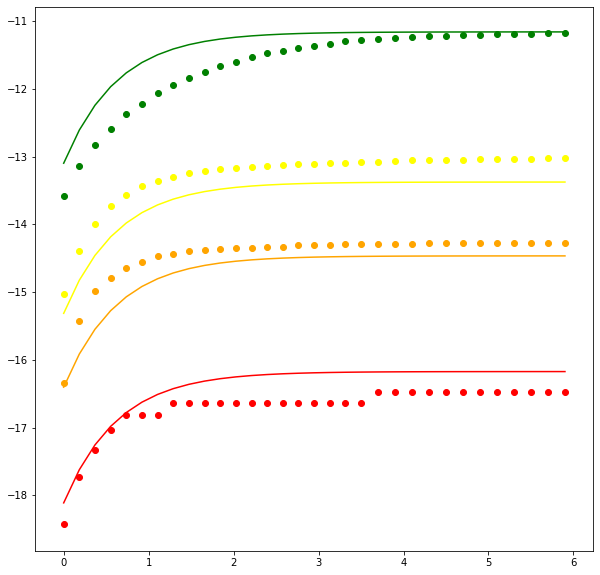

In [20]:
plt.figure(figsize=(10,10))
colours = ['green','yellow', 'orange', 'red']
max_y = 0
max_x = 0
for i in range(4):
#     print(np.e**(_sets[i]))
    if max_y < max(np.log(y_sets[i])) + 0.1*max(np.log(y_sets[i])):
        max_y = max(np.log(y_sets[i])) + 0.1*max(np.log(y_sets[i]))
    
    if max_y < max(10**(model_full(x_sets[i],frequencies[i], *result[0]))) + 0.1*max(model_full(x_sets[i],frequencies[i], *result[0])):
        max_y = max(10**(model_full(x_sets[i],frequencies[i], *result[0]))) + 0.1*max(model_full(x_sets[i],frequencies[i], *result[0]))
    
    if max_x < max(x_sets[i]) + 0.05*max(x_sets[i]):
        max_x = max(x_sets[i]) + 0.05*max(x_sets[i])
    
    plt.scatter(x_sets[i],np.log(y_sets[i]),color=colours[i])
    plt.plot(x_sets[i], model_full(x_sets[i],frequencies[i], *result[0]), color=colours[i])
axes = plt.gca()
# axes.set_ylim(-0.1e-7,max_y)
# axes.set_xlim(-0.1,max_x)

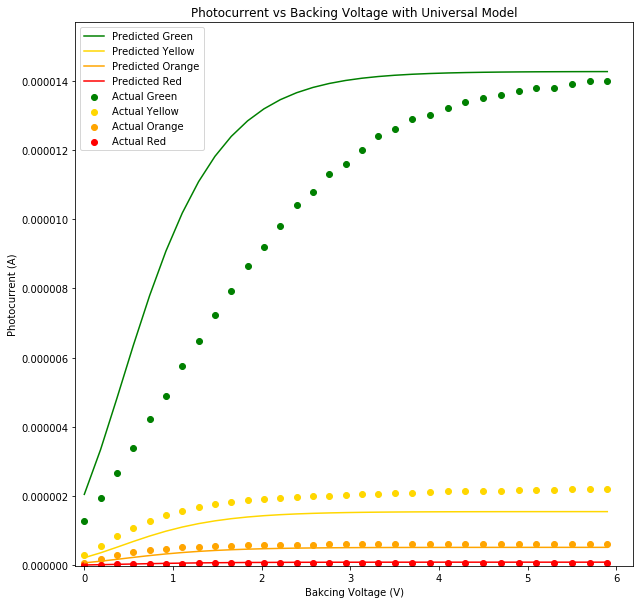

In [51]:
plt.figure(figsize=(10,10))
colours = ['green','gold', 'orange', 'red']
labels = ['Actual Green', 'Actual Yellow', 'Actual Orange', 'Actual Red']
model_labels = ['Predicted Green', 'Predicted Yellow', 'Predicted Orange', 'Predicted Red']
max_y = 0
max_x = 0
for i in range(4):
#     print(np.e**(_sets[i]))
    if max_y < max(y_sets[i]) + 0.1*max(y_sets[i]):
        max_y = max(y_sets[i]) + 0.1*max(y_sets[i])
    
    if max_y < max(np.e**(model_full(x_sets[i],frequencies[i], *result[0]))) + 0.1*max(np.e**(model_full(x_sets[i],frequencies[i], *result[0]))):
        max_y = max(np.e**(model_full(x_sets[i],frequencies[i], *result[0]))) + 0.1*max(np.e**(model_full(x_sets[i],frequencies[i], *result[0])))
    
    if max_x < max(x_sets[i]) + 0.05*max(x_sets[i]):
        max_x = max(x_sets[i]) + 0.05*max(x_sets[i])
    
    plt.scatter(x_sets[i],y_sets[i],color=colours[i],label=labels[i])
    plt.plot(x_sets[i], np.e**(model_full(x_sets[i],frequencies[i], *result[0])), color=colours[i], label=model_labels[i])
axes = plt.gca()
axes.set_ylim(-0.1e-7,max_y)
axes.set_xlim(-0.1,max_x)
plt.title(r'Photocurrent vs Backing Voltage with Universal Model')
plt.xlabel(r'Bakcing Voltage (V)')
plt.ylabel(r'Photocurrent (A)')
plt.legend()